#### **1. Importing Required Package and Modules**

Installation of the necessary modules.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [ ]:
# Importing the negative selection.
from aisp.nsa import RNSA

# Importing other packages. 
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### 2. Generating dice bubbles for classes randomly.

Using the make_blobs function, two sets of data are generated in the form of bubbles, in the range between 0 and 1, representing each class x and y. Then this data is separated into test and training sets.

In [7]:
# Generating the samples and outputs for the training.
samples, output = make_blobs(
    n_samples=500,
    cluster_std=0.07,
    center_box=(0.0, 1.0),
    centers=[[0.25, 0.75], [0.75, 0.25]],
    random_state=1234,
)
# Separating data for training and testing.
train_x, test_x, train_y, test_y = train_test_split(samples, output, test_size=0.2)

#### 3. Testing the model ``default-NSA``:
Start the model with 500 detectors, each with a radius of 0.06. Then, it presents the result of the forecast accuracy.

In [8]:
# Starting the class.
nsa = RNSA(N=500, r=0.05, seed=1234)
# Carrying out the training:
nsa.fit(X=train_x, y=train_y)
# Previewing classes with test samples.
prev_y = nsa.predict(test_x)
# Showing the accuracy of predictions for actual data.
print(f"The accuracy is {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))

✔ Non-self detectors for classes (0, 1) successfully generated:  ┇██████████┇ 1000/1000 detectors


The accuracy is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



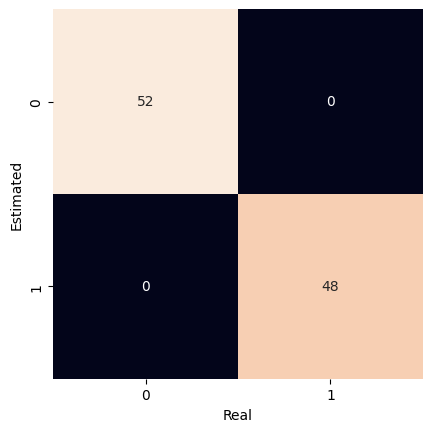

In [9]:
# Generating the confusion matrix and plotting it graphically.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()

#### 4. Detector and sample plotting:

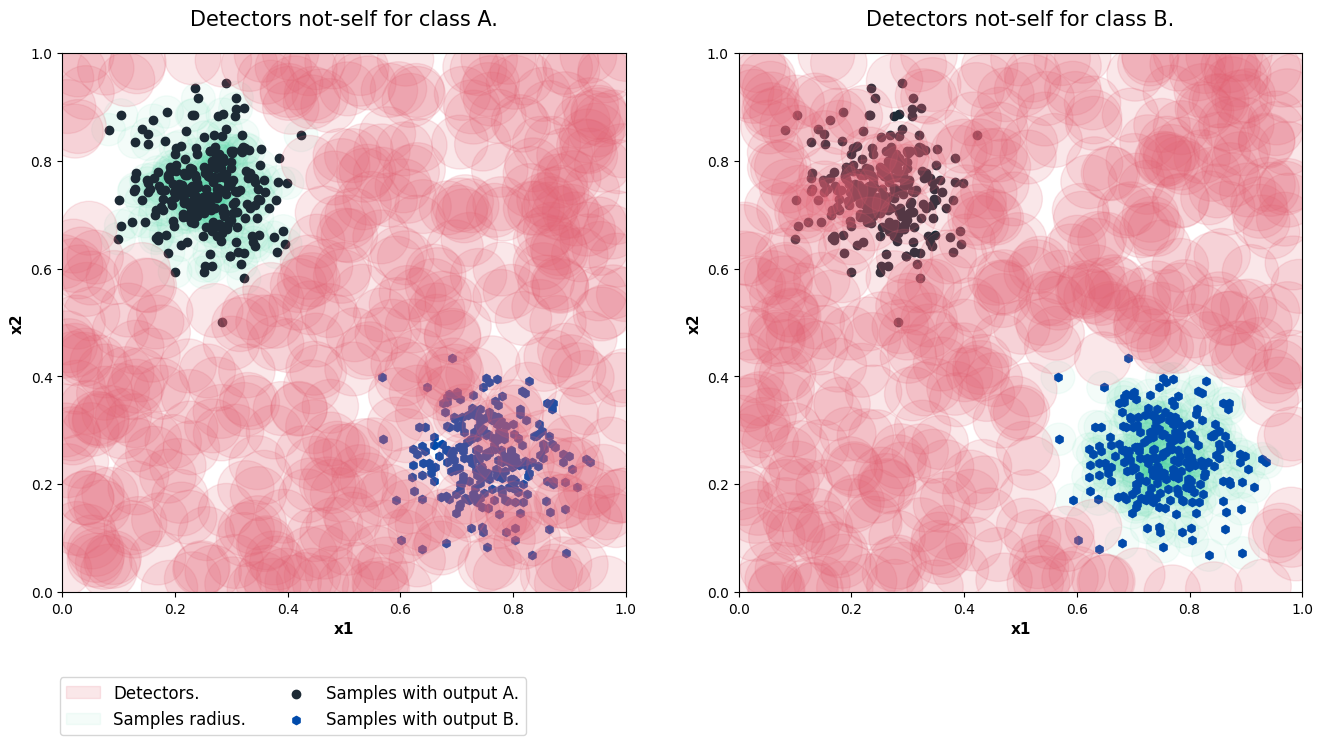

In [10]:
def plot_detectores(samples, train_x, nsa, rs):
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 7))
    labels = ['A', 'B']
    classesIndex = np.array((np.nonzero(output == 0)[0] ,np.nonzero(output == 1)[0]))

    for i in range(2):
        ax[i].axis([0, 1,0,1])
        
        if rs > 0 and train_x is not None:
            Index = np.nonzero(train_y == i)[0]
            for x in train_x[Index]:
                ax[i].add_patch(plt.Circle((x[0], x[1]), color='#34d399', radius=(rs), alpha=0.05, label='Samples radius.'))
        
        ax[i].scatter(samples[classesIndex[0], 0], samples[classesIndex[0], 1], label='Samples with output A.', color='#1d2a35')
        ax[i].scatter(samples[classesIndex[1], 0], samples[classesIndex[1], 1], label='Samples with output B.', color='#004aab', marker='h')
        ax[i].set_title(f'Detectors not-self for class {labels[i]}.', fontsize=15, pad=20)
        ax[i].set_xlabel('x1', fontweight='bold', fontsize=11)
        ax[i].set_ylabel('x2', fontweight='bold', fontsize=11)
        
        for k in range(len(nsa.detectors[i])):
            r = nsa.detectors[i][k][1] if len(nsa.detectors[i][k][:]) > 1 else nsa.r
            ax[i].add_patch(plt.Circle((nsa.detectors[i][k][0][0], nsa.detectors[i][k][0][1]), color='#e25f71', radius=(r), alpha=0.15, label='Detectors.'))
        
    handles, labels = [], []
    for a in ax:
        for h, l in zip(*a.get_legend_handles_labels()):
            if l not in labels:
                handles.append(h)
                labels.append(l)
    
    handles_sorted, labels_sorted = zip(*sorted(zip(handles, labels), key=lambda x: x[1]))
    
    if rs > 0:
        fig.legend(handles_sorted, labels_sorted, bbox_to_anchor=(0.42, 0), ncol=2, fontsize='large')
    else:
        fig.legend(handles_sorted[:-1], labels_sorted[:-1], bbox_to_anchor=(0.48, 0), ncol=2, fontsize='large')

    plt.show()

plot_detectores(samples, train_x, nsa, 0.03)

#### 5. Testing the model ``V-detector``:
Start the model with 50 detectors, where the minimum radius is 0.05 and the sample's own radius is 0.04. It then shows the forecast accuracy result.

In [11]:
# Starting the class.
nsa = RNSA(N=20, r=0.05, algorithm='V-detector', r_s=0.04, seed=123)
# Carrying out the training:
nsa.fit(X=train_x, y=train_y)
# Previewing classes with test samples.
prev_y = nsa.predict(test_x)
# Showing the accuracy of predictions for actual data.
print(f"The accuracy is {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))

✔ Non-self detectors for classes (0, 1) successfully generated:  ┇██████████┇ 40/40 detectors

The accuracy is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



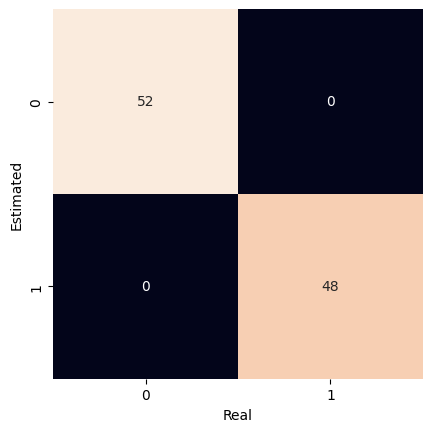

In [12]:
# Generating the confusion matrix and plotting it graphically.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(
    mat.T, 
    square=True,
    annot=True,
    fmt='d',
    cbar=False, 
    xticklabels=nsa.classes,
    yticklabels=nsa.classes
)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()

#### 6. Detector and sample plotting:

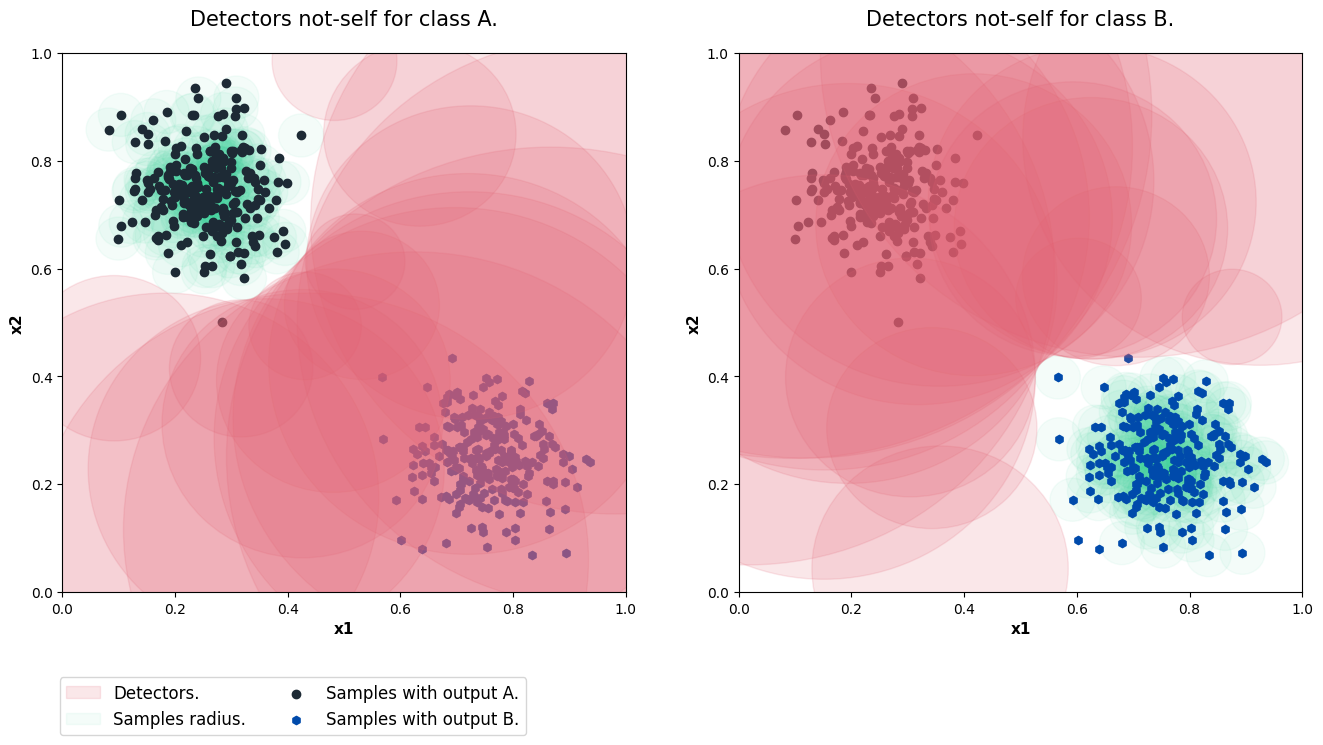

In [13]:
plot_detectores(samples, train_x, nsa, 0.04)